### 2-2. MLP 모델 복습하기

In [1]:
import sys
import tensorflow as tf
import numpy as np

2025-03-02 18:22:14.117565: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 18:22:14.129902: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 18:22:14.181521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740907334.265413    8633 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740907334.288403    8633 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 18:22:14.337246: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


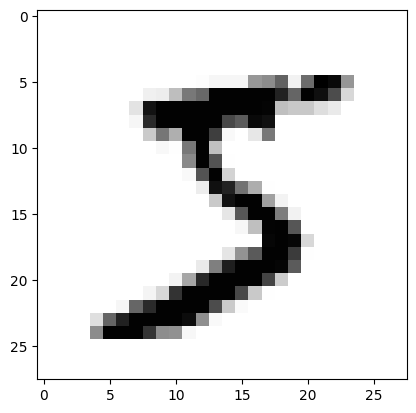

In [3]:
# MNIST 데이터를 시각화하기 
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [4]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [5]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
# Label 값을 One-hot encoding 하기 
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [8]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# 모델 설계하기 
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=out_layer)
model.summary()

2025-03-02 18:22:22.888365: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

In [11]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Epoch 1/30


2025-03-02 18:22:23.600652: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 0.6207 - loss: 41.4963

2025-03-02 18:22:30.693556: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - categorical_accuracy: 0.6241 - loss: 40.9817 - val_categorical_accuracy: 0.9123 - val_loss: 1.4781
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - categorical_accuracy: 0.9264 - loss: 1.0528 - val_categorical_accuracy: 0.9295 - val_loss: 0.8163
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - categorical_accuracy: 0.9520 - loss: 0.4256 - val_categorical_accuracy: 0.9376 - val_loss: 0.6796
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - categorical_accuracy: 0.9673 - loss: 0.2426 - val_categorical_accuracy: 0.9398 - val_loss: 0.6187
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - categorical_accuracy: 0.9772 - loss: 0.1357 - val_categorical_accuracy: 0.9449 - val_loss: 0.5730
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - categorical_accuracy: 0.9856 - loss: 0.0718 - val_categorical_accuracy: 0.9446 - val_loss: 0.5511
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - categorical_accuracy: 0.9901 - loss: 0.0408

In [12]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

[16.278093338012695, 0.9178506731987, 0.43297985196113586, 0.2422950267791748, 0.1364331692457199, 0.07685896754264832, 0.04487713798880577, 0.02368081919848919, 0.013409885577857494, 0.007448945194482803, 0.0042578172869980335, 0.0022947117686271667, 0.0009902616729959846, 0.0005456894868984818, 0.0004931636503897607, 0.0002874179626815021, 0.00023677624994888902, 0.00021496524277608842, 0.00019956119649577886, 0.0001845295773819089, 0.0001725650654407218, 0.00016099115600809455, 0.0001521761587355286, 0.0001442576030967757, 0.00013640537508763373, 0.00012992396659683436, 0.0001234613882843405, 0.00011776089377235621, 0.0001123360198107548, 0.00010755703988252208]


In [13]:
# Validation loss 확인하기
val_loss = history.history['val_loss']
print(val_loss)

[1.4780701398849487, 0.816254734992981, 0.6795967817306519, 0.6186977028846741, 0.5729880928993225, 0.5510981678962708, 0.5262537002563477, 0.5281292200088501, 0.5238125324249268, 0.5144408941268921, 0.5100942254066467, 0.512571394443512, 0.5068259835243225, 0.505850613117218, 0.5048900246620178, 0.5036641955375671, 0.503666877746582, 0.5033518671989441, 0.5033506155014038, 0.5032411813735962, 0.503208577632904, 0.5030928254127502, 0.5024920105934143, 0.5025582909584045, 0.5024889707565308, 0.5025352239608765, 0.5020771622657776, 0.5021051168441772, 0.5019086003303528, 0.5019683241844177]


In [14]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

2025-03-02 18:25:34.806524: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - categorical_accuracy: 0.9479 - loss: 0.5493

 Test Accuracy: 0.9559


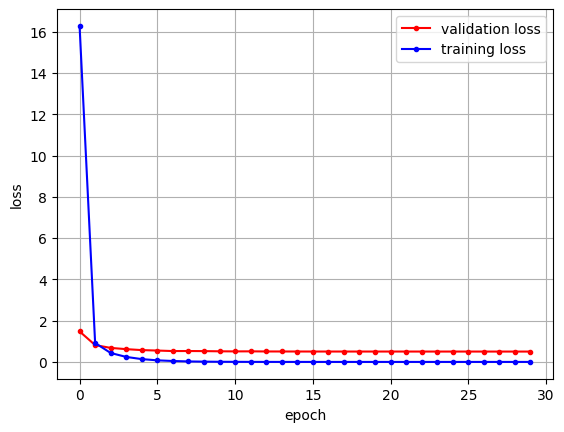

In [15]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 2-3. MLP 모델의 한계

In [16]:
# OpenCV 모듈 불러오기
import cv2

In [17]:
# 다시 한번 MNIST 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

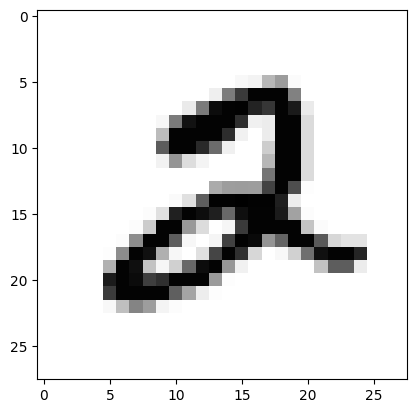

In [18]:
plt.imshow(X_train[5], cmap='Greys')

In [19]:
# 이미지 회전 변환 메트릭스 구하기 
M= cv2.getRotationMatrix2D((20, 25), 20, 1)  ## 회전 변환 Matrix 생성

# 이미지 이동 변환 메트릭스 구하기
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 3

# 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(X_train[5], M, (28, 28))  ## image에 matrix 곱

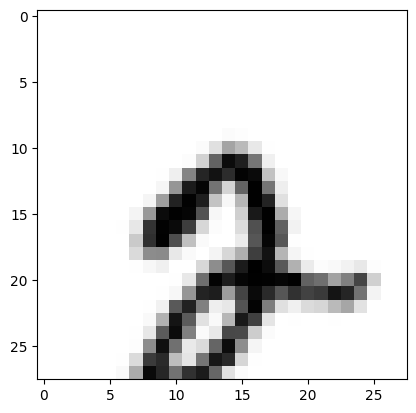

In [20]:
plt.imshow(test_image, cmap='Greys')

In [21]:
# MLP의 input 데이터를 넣어주기 위해 1x784 형태로 reshape하고 normalization
test_image_reshape = test_image.reshape(1, 784).astype('float64')

In [22]:
Y_prediction = model.predict(test_image_reshape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


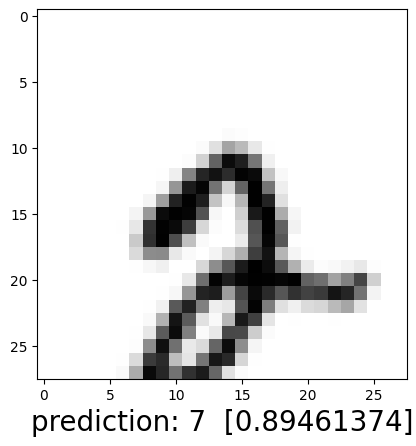

In [23]:
index = np.argmax(Y_prediction) # 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출 
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()